# Tata stock price prediction

Author-Sujal Kapoor

# Data collected from yfinance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yfinance as yf 
import datetime as date

In [2]:
ticker= 'TATAMOTORS.NS'
data=yf.download(ticker,start='2010-01-01',end='2024-10-12')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.sample()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,327.600006,330.0,312.600006,315.899994,313.949677,103512235


In [4]:
data.reset_index(inplace=True)

In [5]:
df=data

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,156.303482,164.040497,156.184769,163.535919,152.195297,27906448
1,2010-01-05,162.259598,167.147186,153.246277,160.686478,149.543457,23669317
2,2010-01-06,162.200241,162.932388,159.311234,160.933823,149.773666,14990820
3,2010-01-07,161.171280,161.923218,154.344498,155.432831,144.654144,22722030
4,2010-01-08,156.323273,159.251862,155.343781,156.283707,145.446030,16495776
...,...,...,...,...,...,...,...
3641,2024-10-07,942.000000,944.450012,915.000000,927.849976,927.849976,11772546
3642,2024-10-08,916.000000,924.799988,893.849976,919.799988,919.799988,21177886
3643,2024-10-09,926.799988,948.450012,925.500000,939.150024,939.150024,11557737
3644,2024-10-10,933.750000,943.599976,912.349976,928.500000,928.500000,13249851


In [7]:
df.count()

Date         3646
Open         3646
High         3646
Low          3646
Close        3646
Adj Close    3646
Volume       3646
dtype: int64

In [8]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3646 non-null   datetime64[ns]
 1   Open       3646 non-null   float64       
 2   High       3646 non-null   float64       
 3   Low        3646 non-null   float64       
 4   Close      3646 non-null   float64       
 5   Adj Close  3646 non-null   float64       
 6   Volume     3646 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 199.5 KB


In [10]:
df.duplicated().sum()

0

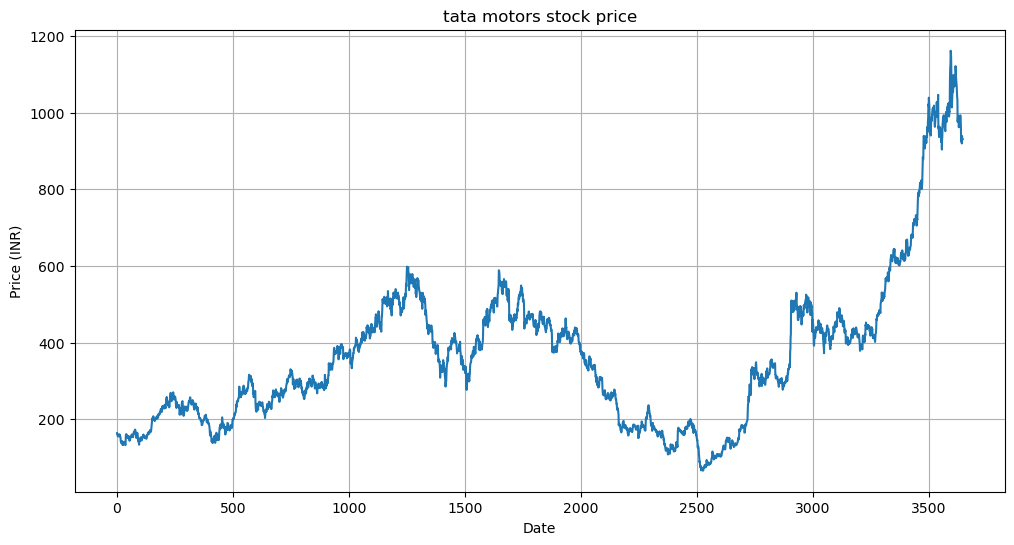

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title('tata motors stock price')
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,156.303482,164.040497,156.184769,163.535919,152.195297,27906448
1,2010-01-05,162.259598,167.147186,153.246277,160.686478,149.543457,23669317
2,2010-01-06,162.200241,162.932388,159.311234,160.933823,149.773666,14990820
3,2010-01-07,161.171280,161.923218,154.344498,155.432831,144.654144,22722030
4,2010-01-08,156.323273,159.251862,155.343781,156.283707,145.446030,16495776
...,...,...,...,...,...,...,...
3641,2024-10-07,942.000000,944.450012,915.000000,927.849976,927.849976,11772546
3642,2024-10-08,916.000000,924.799988,893.849976,919.799988,919.799988,21177886
3643,2024-10-09,926.799988,948.450012,925.500000,939.150024,939.150024,11557737
3644,2024-10-10,933.750000,943.599976,912.349976,928.500000,928.500000,13249851


# plotting moving average of 100 days 

In [13]:
ma100=df.Close.rolling(100).mean()

In [14]:
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3641    1009.009499
3642    1008.560999
3643    1008.479499
3644    1008.400499
3645    1008.250499
Name: Close, Length: 3646, dtype: float64

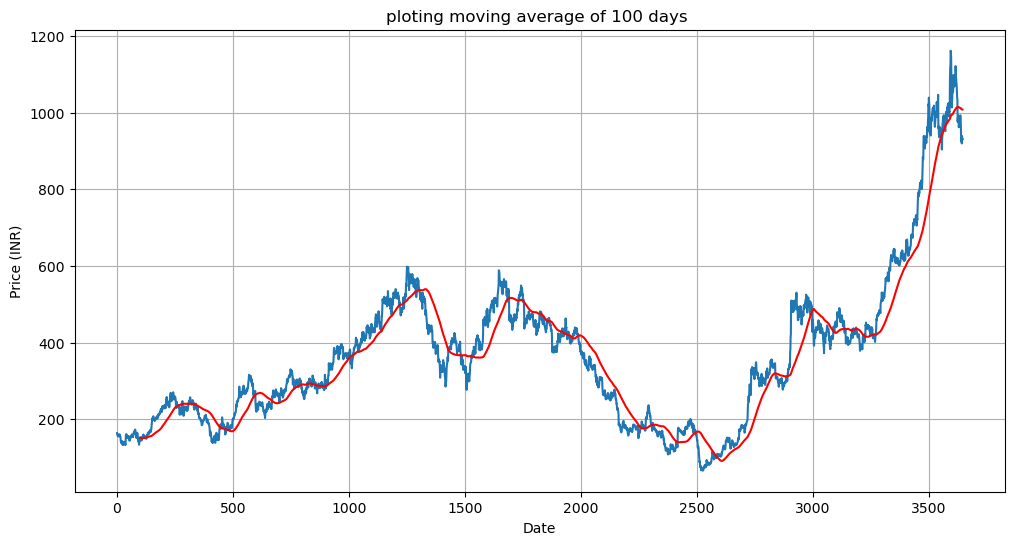

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')
plt.title('ploting moving average of 100 days ')
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

 Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

In [16]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3641    959.920500
3642    960.918000
3643    962.015001
3644    962.995500
3645    963.995001
Name: Close, Length: 3646, dtype: float64

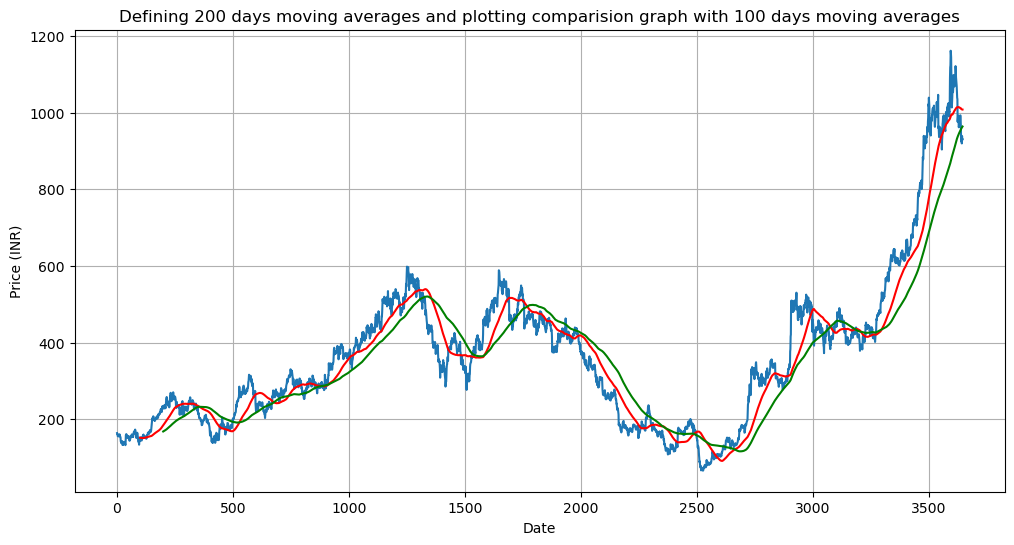

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.title('Defining 200 days moving averages and plotting comparision graph with 100 days moving averages')
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

Spliting the data in the ratio of 70:30

In [18]:
train =pd.DataFrame(data[0:int(len(data)*0.70)])
test=pd.DataFrame(data[int(len(data)*0.70):int(len(data))])

In [19]:
train.shape

(2552, 7)

In [20]:
test.shape

(1094, 7)

In [21]:
train.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
1155,2014-09-03,520.516907,524.870239,515.767883,517.054077,513.653809,7395355


# Normalisation using min max scaling 

In [22]:
scaler= MinMaxScaler(feature_range=(0, 1))
train_close=train.iloc[:,4:5].values
test_close=test.iloc[:,4:5].values
data_training_array=scaler.fit_transform(train_close)
data_testing_array=scaler.transform(test_close)



In [23]:
data_training_array

array([[0.18436482],
       [0.17901711],
       [0.17948132],
       ...,
       [0.03922418],
       [0.04110094],
       [0.03471998]])

In [24]:
data_testing_array

array([[0.03575219],
       [0.0288082 ],
       [0.03096647],
       ...,
       [1.64000302],
       [1.62001553],
       [1.62414442]])

In [25]:
X_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)


In [26]:
X_train.shape

(2452, 100, 1)

In [27]:
X_train[1]

array([[0.17901711],
       [0.17948132],
       [0.1691573 ],
       [0.17075419],
       [0.17088414],
       [0.16945438],
       [0.16895303],
       [0.16791322],
       [0.17350231],
       [0.17857146],
       [0.1770303 ],
       [0.17638039],
       [0.16813602],
       [0.16639059],
       [0.16289974],
       [0.14407139],
       [0.14152753],
       [0.13530711],
       [0.144777  ],
       [0.14091476],
       [0.14540833],
       [0.13354313],
       [0.12708133],
       [0.12747125],
       [0.12862249],
       [0.12615289],
       [0.13287465],
       [0.13114778],
       [0.13857514],
       [0.14167607],
       [0.14106332],
       [0.13733106],
       [0.13928076],
       [0.13729392],
       [0.13163058],
       [0.12529876],
       [0.14156467],
       [0.17381795],
       [0.17797727],
       [0.17936992],
       [0.17240677],
       [0.17366941],
       [0.16564786],
       [0.16665056],
       [0.16354963],
       [0.16002163],
       [0.16306686],
       [0.169

# LSTM 

In [28]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LSTM
from tensorflow.keras.models import Sequential

In [29]:
model= Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=90, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=120, activation = 'relu'))
model.add(Dense(units = 1))

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 90)             │          61,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 90)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 120)                 │         101,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245,121 (957.50 KB)

 Trainable params: 245,121 (957.50 KB)

 Non-trainable params: 0 (0.00 B)

# traing the model

In [31]:
import tensorflow as tf 
model.compile(optimizer='adam',loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
history=model.fit(X_train,y_train,epochs=40,verbose=1)

Epoch 1/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - loss: 0.0810 - mean_absolute_error: 0.2093
Epoch 2/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0047 - mean_absolute_error: 0.0533
Epoch 3/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.0040 - mean_absolute_error: 0.0489
Epoch 4/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0035 - mean_absolute_error: 0.0469
Epoch 5/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0035 - mean_absolute_error: 0.0458
Epoch 6/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - loss: 0.0033 - mean_absolute_error: 0.0442
Epoch 7/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - loss: 0.0028 - mean_absolute_error: 0.0411
Epoch 8/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0025 - mean_absolute_error: 0.0392
Epoch 9/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0023 - mean_absolute_error: 0.0368
Epoch 10/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0023 - mean_absolute_error: 0.0366
Epoch 11/40
77/77 ━━━━

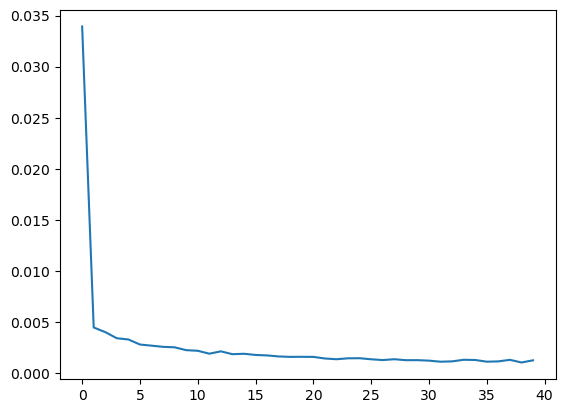

In [33]:
plt.plot(history.history['loss'])


In [34]:
test_close.shape

(1094, 1)

In [35]:

past_100_days = pd.DataFrame(train_close[-100:])

In [36]:

test_df = pd.DataFrame(test_close)

In [37]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [38]:

final_df.head()

,0
0,180.199997
1,174.800003
2,179.149994
3,175.949997
4,176.050003


In [39]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.10478318],
       [0.09985865],
       [0.10382563],
       ...,
       [0.79690853],
       [0.78719622],
       [0.78920253]])

In [40]:
input_data.shape

(1194, 1)

# testing the model 

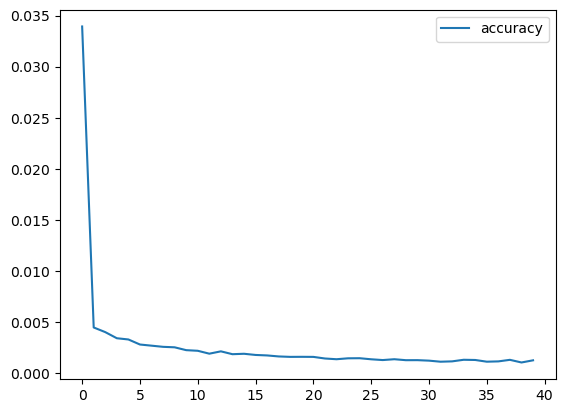

In [41]:
plt.plot(history.history['loss'],label='accuracy')

plt.legend()

In [42]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [43]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1094, 100, 1)
(1094,)


# prediction

In [44]:
y_pred=model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step


In [45]:
y_pred.shape

(1094, 1)

In [46]:
y_test[10:20]

array([0.02211482, 0.02845287, 0.03050476, 0.03027678, 0.04144818,
       0.04573434, 0.04208654, 0.04204095, 0.0372532 , 0.03647805])

In [47]:
y_pred.shape

(1094, 1)

In [48]:
scaling_factor_number=scaler.scale_[0]

In [49]:
scale_factor=1/scaling_factor_number

In [50]:
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

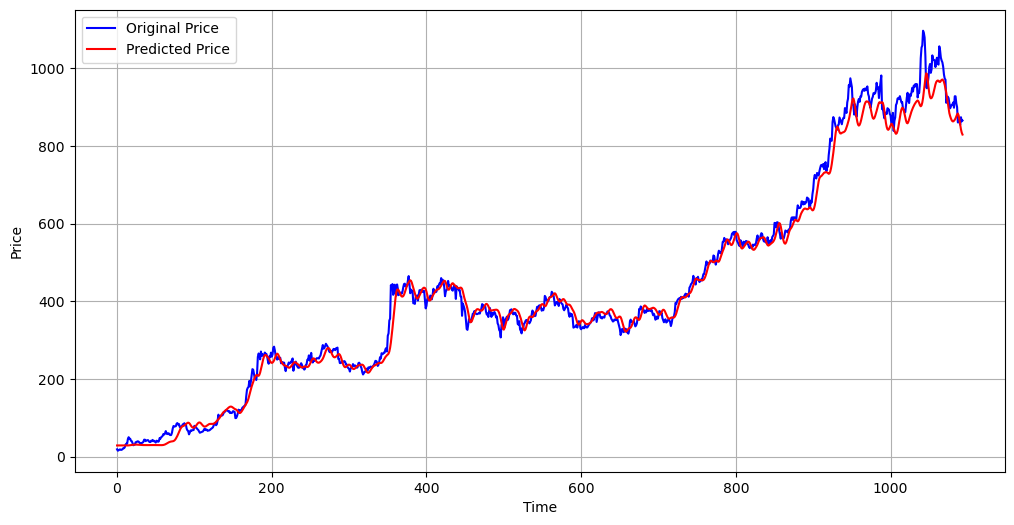

In [51]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 4.39%


In [53]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9889960675568155


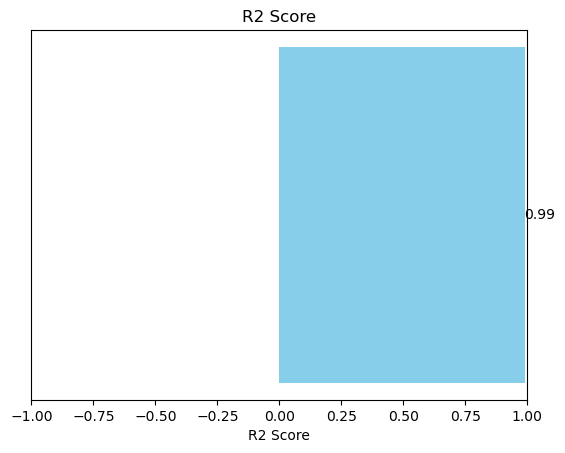

In [54]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

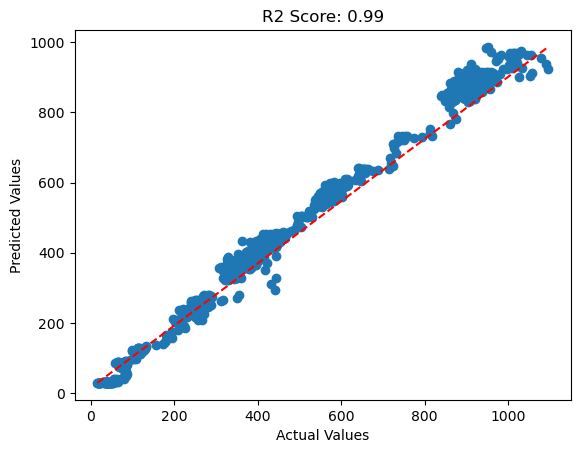

In [55]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [56]:
model.save('stock_prediction.h5')

In [57]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3641,2024-10-07,942.000000,944.450012,915.000000,927.849976,927.849976,11772546
3642,2024-10-08,916.000000,924.799988,893.849976,919.799988,919.799988,21177886
3643,2024-10-09,926.799988,948.450012,925.500000,939.150024,939.150024,11557737
3644,2024-10-10,933.750000,943.599976,912.349976,928.500000,928.500000,13249851
3645,2024-10-11,932.000000,937.000000,928.500000,930.700012,930.700012,4459529
